# Análisis y gestión de nulos de la columnas categóricas

In [2]:
import pandas as pd
import numpy as np 
import sys
sys.path.append('..')

# Paquetes d visualización
import seaborn as sns
import matplotlib.pyplot as plt 

# Importaciones de unidades de soporte 
from src import sp_eda as sp
from src import sp_visualizacin as spv

In [3]:
df= pd.read_csv('../data/data_limpios.csv',parse_dates=['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209915 entries, 0 to 209914
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   campaign_id       209915 non-null  int64         
 1   company           194734 non-null  object        
 2   campaign_type     191535 non-null  object        
 3   duration          191309 non-null  float64       
 4   channel_used      187421 non-null  object        
 5   conversion_rate   200471 non-null  float64       
 6   roi               173439 non-null  float64       
 7   location          184543 non-null  object        
 8   language          182907 non-null  object        
 9   clicks            178736 non-null  float64       
 10  impressions       188467 non-null  float64       
 11  engagement_score  186051 non-null  float64       
 12  customer_segment  196763 non-null  object        
 13  date              203007 non-null  datetime64[ns]
 14  tota

In [5]:
sp.calcular_porcentaje_nulos(df)

campaign_id          0.00
company              7.23
campaign_type        8.76
duration             8.86
channel_used        10.72
conversion_rate      4.50
roi                 17.38
location            12.09
language            12.87
clicks              14.85
impressions         10.22
engagement_score    11.37
customer_segment     6.27
date                 3.29
total($)             3.85
genre               30.90
ages                13.63
year                 3.29
month                3.29
day_name             3.29
quarter              3.29
dtype: float64

In [6]:
col_cat= df.select_dtypes(include='O').columns
col_cat

Index(['company', 'campaign_type', 'channel_used', 'location', 'language',
       'customer_segment', 'genre', 'ages', 'day_name'],
      dtype='object')

In [7]:
sp.analisis_general_cat(df)

La distribución de la columna COMPANY
Esta columna tiene 6 valores únicos


company
techcorp               0.201352
alpha innovations      0.200735
datatech solutions     0.199703
nexgen systems         0.199652
innovate industries    0.198558
Name: proportion, dtype: float64

----------------- 
 Describe


count       194734
unique           5
top       techcorp
freq         39210
Name: company, dtype: object

__________________
La distribución de la columna CAMPAIGN_TYPE
Esta columna tiene 6 valores únicos


campaign_type
influencer      0.200642
search          0.200063
email           0.199922
social media    0.199859
display         0.199514
Name: proportion, dtype: float64

----------------- 
 Describe


count         191535
unique             5
top       influencer
freq           38430
Name: campaign_type, dtype: object

__________________
La distribución de la columna CHANNEL_USED
Esta columna tiene 7 valores únicos


channel_used
email         0.167863
instagram     0.167687
google ads    0.166998
youtube       0.166988
website       0.166198
facebook      0.164267
Name: proportion, dtype: float64

----------------- 
 Describe


count     187421
unique         6
top        email
freq       31461
Name: channel_used, dtype: object

__________________
La distribución de la columna LOCATION
Esta columna tiene 6 valores únicos


location
miami          0.201796
chicago        0.200344
los angeles    0.199937
new york       0.199298
houston        0.198626
Name: proportion, dtype: float64

----------------- 
 Describe


count     184543
unique         5
top        miami
freq       37240
Name: location, dtype: object

__________________
La distribución de la columna LANGUAGE
Esta columna tiene 6 valores únicos


language
mandarin    0.201419
spanish     0.200905
german      0.199943
english     0.199139
french      0.198593
Name: proportion, dtype: float64

----------------- 
 Describe


count       182907
unique           5
top       mandarin
freq         36841
Name: language, dtype: object

__________________
La distribución de la columna CUSTOMER_SEGMENT
Esta columna tiene 6 valores únicos


customer_segment
foodies                0.201110
tech enthusiasts       0.200841
outdoor adventurers    0.199855
health & wellness      0.199285
fashionistas           0.198909
Name: proportion, dtype: float64

----------------- 
 Describe


count      196763
unique          5
top       foodies
freq        39571
Name: customer_segment, dtype: object

__________________
La distribución de la columna GENRE
Esta columna tiene 3 valores únicos


genre
men      0.501889
women    0.498111
Name: proportion, dtype: float64

----------------- 
 Describe


count     145058
unique         2
top          men
freq       72803
Name: genre, dtype: object

__________________
La distribución de la columna AGES
Esta columna tiene 5 valores únicos


ages
25-34       0.399992
18-24       0.202056
all_ages    0.199905
35-44       0.198046
Name: proportion, dtype: float64

----------------- 
 Describe


count     181301
unique         4
top        25-34
freq       72519
Name: ages, dtype: object

__________________
La distribución de la columna DAY_NAME
Esta columna tiene 8 valores únicos


day_name
friday       0.145557
wednesday    0.142764
saturday     0.142616
thursday     0.142369
tuesday      0.142256
monday       0.142241
sunday       0.142197
Name: proportion, dtype: float64

----------------- 
 Describe


count     203007
unique         7
top       friday
freq       29549
Name: day_name, dtype: object

__________________


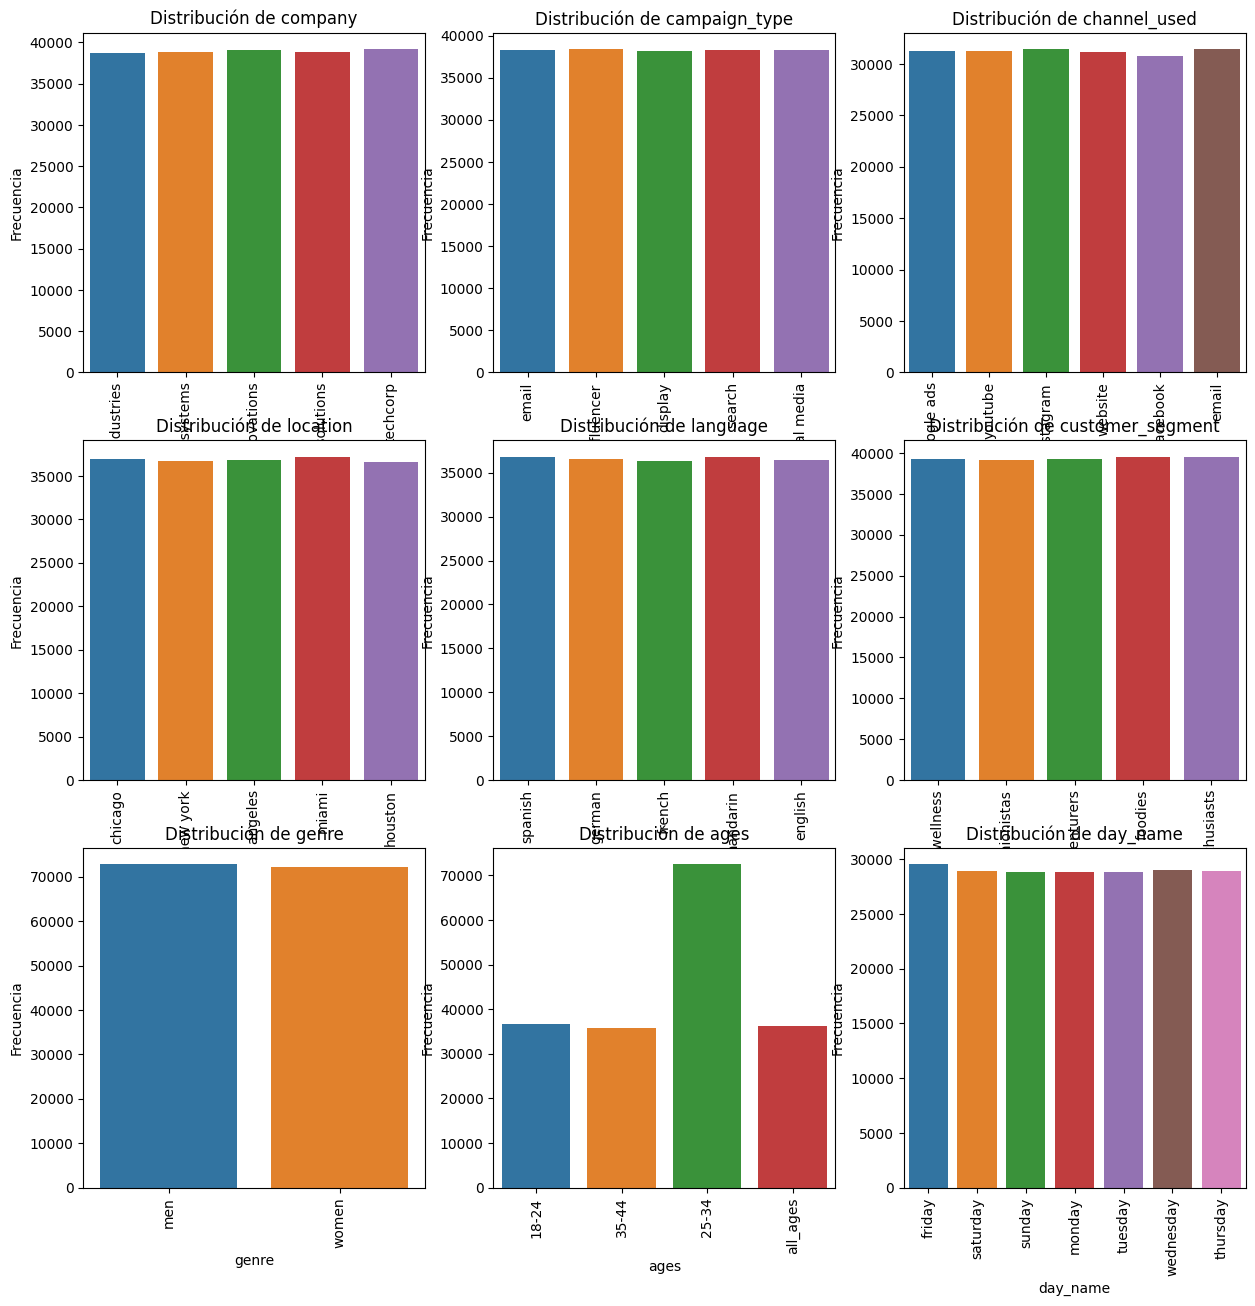

In [8]:
spv.visualizacion_cat(df)

In [9]:
df_cat= df[df.select_dtypes(include='O').columns]
sp.calcular_porcentaje_nulos(df_cat)

company              7.23
campaign_type        8.76
channel_used        10.72
location            12.09
language            12.87
customer_segment     6.27
genre               30.90
ages                13.63
day_name             3.29
dtype: float64

Una vez estudido las freceuncias y porcentajes de nulos, teniendo en cuenta que no es posible eliminar y tampoco sustituir por la moda, se ha decido rellenar por 'Desconocido'.

In [13]:
df_cat=df_cat.fillna('Unknow')
df[df.select_dtypes(include='O').columns]=df_cat
sp.calcular_porcentaje_nulos(df)

campaign_id          0.00
company              0.00
campaign_type        0.00
duration             8.86
channel_used         0.00
conversion_rate      4.50
roi                 17.38
location             0.00
language             0.00
clicks              14.85
impressions         10.22
engagement_score    11.37
customer_segment     0.00
date                 3.29
total($)             3.85
genre                0.00
ages                 0.00
year                 3.29
month                3.29
day_name             0.00
quarter              3.29
dtype: float64